In [98]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [99]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import normalize

import numpy as np

In [100]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train, y_train)
print(X_test, y_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [5 0 4 ... 5 6 8]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0

In [101]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [102]:
    X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [103]:
X_train = normalize(X_train)
X_test = normalize(X_test)
print(X_train,X_test)
print(X_train.shape, X_test.shape)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [104]:
print(y_train.shape, y_test.shape)
y_train = to_categorical(y_train)
print(y_train.shape)
y_test = to_categorical(y_test)
print(y_test.shape)

(60000,) (10000,)
(60000, 10)
(10000, 10)


In [105]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [106]:
classes_count = y_test.shape[1]
print(classes)

10


In [107]:
def recognition_model():
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(classes_count, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [108]:
model = recognition_model()
model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=200, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 22s 450us/sample - loss: 0.2895 - acc: 0.9154 - val_loss: 0.0991 - val_acc: 0.9711
Epoch 2/5
48000/48000 [==============================] - 21s 445us/sample - loss: 0.0968 - acc: 0.9699 - val_loss: 0.0842 - val_acc: 0.9755
Epoch 3/5
48000/48000 [==============================] - 21s 440us/sample - loss: 0.0716 - acc: 0.9774 - val_loss: 0.0716 - val_acc: 0.9787
Epoch 4/5
48000/48000 [==============================] - 21s 439us/sample - loss: 0.0601 - acc: 0.9814 - val_loss: 0.0675 - val_acc: 0.9787
Epoch 5/5
48000/48000 [==============================] - 21s 441us/sample - loss: 0.0467 - acc: 0.9854 - val_loss: 0.0631 - val_acc: 0.9799


In [109]:
print(model.metrics_names)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(test_loss, test_acc)

['loss', 'acc']
10000/10000 [==============================] - 2s 167us/sample - loss: 0.0641 - acc: 0.9787
0.06406143728438765 0.9787


# Testing the model

In [118]:
test_observation = X_test[4]
test_observation = test_observation.reshape(1, test_observation.shape[0], test_observation.shape[1], 1)
prediction = model.predict_classes(test_observation)
# result = np.argmax(prediction, axis=-1)
print(prediction, np.argmax(y_test[4]))

[4] 4


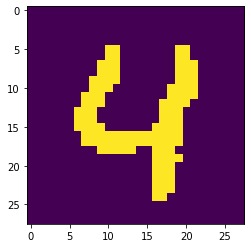

In [120]:
plt.imshow(X_test[4])

In [ ]:
model.save('digit_recognition_model.h5')